In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 23.3MB/s]
100% 163M/163M [00:08<00:00, 19.9MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_path = os.listdir('/content/data/with_mask')
without_mask_path = os.listdir('/content/data/without_mask')

In [10]:
#printing the first 5 files
print(with_mask_path[:5])
print(without_mask_path[:5])

['with_mask_1582.jpg', 'with_mask_120.jpg', 'with_mask_2208.jpg', 'with_mask_155.jpg', 'with_mask_2747.jpg']
['without_mask_509.jpg', 'without_mask_2086.jpg', 'without_mask_3085.jpg', 'without_mask_2510.jpg', 'without_mask_1884.jpg']


In [12]:
#print the len of dataset
print('No.of Images without mask',len(without_mask_path))
print('No.of Images with mask',len(with_mask_path))

No.of Images without mask 3828
No.of Images with mask 3725


In [13]:
#now give the labels to these two datasets
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [15]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print('No.of Images without mask',len(without_mask_labels))
print('No.of Images with mask',len(with_mask_labels))

No.of Images without mask 3828
No.of Images with mask 3725


In [18]:
labels=without_mask_labels+with_mask_labels
print(len(labels))

7553


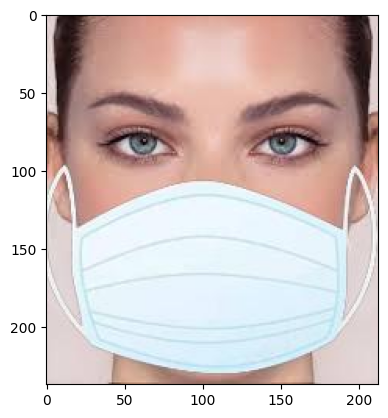

In [19]:
#Now start displaying the image
img = mpimg.imread('/content/data/with_mask/with_mask_1546.jpg')
imgplot = plt.imshow(img)
plt.show()

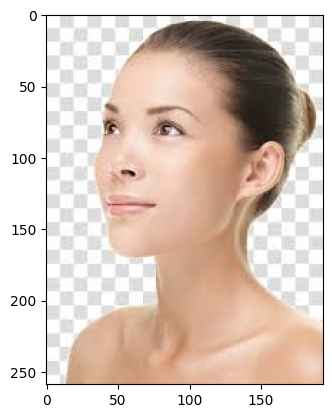

In [22]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [36]:
#Image Processing

# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data1 = []

for img_file in os.listdir(with_mask_path):

  image = Image.open(os.path.join(with_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data1.append(image)

  #for without

without_mask_path = '/content/data/without_mask/'

for img_file in os.listdir(without_mask_path):

  image = Image.open(os.path.join(without_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data1.append(image)


In [40]:
print(len(data1))
print(type(data1))
print(data1[2])

7553
<class 'list'>
[[[178 173 170]
  [179 174 171]
  [179 174 171]
  ...
  [172 167 161]
  [172 167 161]
  [171 166 160]]

 [[163 158 155]
  [163 158 155]
  [164 159 156]
  ...
  [157 152 146]
  [156 151 145]
  [157 152 146]]

 [[166 161 158]
  [166 161 158]
  [167 162 159]
  ...
  [160 155 149]
  [159 154 148]
  [159 154 148]]

 ...

 [[176 176 178]
  [177 177 179]
  [177 177 179]
  ...
  [182 181 187]
  [181 180 186]
  [180 179 185]]

 [[175 175 177]
  [176 176 178]
  [177 177 179]
  ...
  [182 181 187]
  [181 180 186]
  [180 179 185]]

 [[174 174 176]
  [174 174 176]
  [174 174 176]
  ...
  [181 180 185]
  [180 179 184]
  [179 178 184]]]


In [44]:
data1[4].shape

(128, 128, 3)

In [46]:
X=np.array(data1)
Y=np.array(labels)

In [47]:
print(X)
print(Y)

[[[[ 99  65  19]
   [100  66  20]
   [101  67  21]
   ...
   [166 209 244]
   [184 217 240]
   [229 248 253]]

  [[ 98  64  18]
   [ 99  65  19]
   [100  66  20]
   ...
   [166 210 245]
   [185 217 241]
   [230 248 253]]

  [[ 98  64  18]
   [ 98  64  18]
   [ 99  65  19]
   ...
   [166 210 245]
   [185 218 241]
   [230 248 253]]

  ...

  [[ 42  35  25]
   [ 46  36  23]
   [ 53  39  21]
   ...
   [ 19  39  78]
   [ 24  46  85]
   [ 27  50  89]]

  [[ 42  35  25]
   [ 46  36  23]
   [ 53  39  21]
   ...
   [ 15  35  74]
   [ 17  39  79]
   [ 20  44  82]]

  [[ 42  35  25]
   [ 46  36  23]
   [ 53  39  21]
   ...
   [ 13  33  72]
   [ 13  35  75]
   [ 16  40  78]]]


 [[[249 241 239]
   [251 242 240]
   [254 244 242]
   ...
   [ 33  23  21]
   [ 46  35  32]
   [ 53  42  38]]

  [[254 250 249]
   [254 247 246]
   [252 242 240]
   ...
   [ 27  17  15]
   [ 33  22  19]
   [ 36  24  22]]

  [[255 248 246]
   [253 243 242]
   [250 236 234]
   ...
   [ 27  17  15]
   [ 28  18  16]
   [ 29  19

In [49]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [51]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [54]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [55]:
print(X_train[0])

[[[235 235 237]
  [235 235 237]
  [235 235 237]
  ...
  [239 239 241]
  [240 239 243]
  [240 239 243]]

 [[245 245 247]
  [245 245 247]
  [245 245 247]
  ...
  [249 249 251]
  [250 250 252]
  [250 250 252]]

 [[246 246 248]
  [246 246 248]
  [246 246 248]
  ...
  [250 250 252]
  [251 251 253]
  [251 251 252]]

 ...

 [[245 242 249]
  [245 242 249]
  [244 243 249]
  ...
  [248 246 251]
  [248 246 251]
  [247 246 252]]

 [[245 242 249]
  [245 242 249]
  [244 243 249]
  ...
  [249 247 252]
  [249 247 253]
  [247 246 252]]

 [[244 241 248]
  [244 242 248]
  [243 242 248]
  ...
  [249 247 252]
  [250 247 253]
  [248 247 253]]]


In [56]:
print(X_train_scaled[0])

[[[0.92156863 0.92156863 0.92941176]
  [0.92156863 0.92156863 0.92941176]
  [0.92156863 0.92156863 0.92941176]
  ...
  [0.9372549  0.9372549  0.94509804]
  [0.94117647 0.9372549  0.95294118]
  [0.94117647 0.9372549  0.95294118]]

 [[0.96078431 0.96078431 0.96862745]
  [0.96078431 0.96078431 0.96862745]
  [0.96078431 0.96078431 0.96862745]
  ...
  [0.97647059 0.97647059 0.98431373]
  [0.98039216 0.98039216 0.98823529]
  [0.98039216 0.98039216 0.98823529]]

 [[0.96470588 0.96470588 0.97254902]
  [0.96470588 0.96470588 0.97254902]
  [0.96470588 0.96470588 0.97254902]
  ...
  [0.98039216 0.98039216 0.98823529]
  [0.98431373 0.98431373 0.99215686]
  [0.98431373 0.98431373 0.98823529]]

 ...

 [[0.96078431 0.94901961 0.97647059]
  [0.96078431 0.94901961 0.97647059]
  [0.95686275 0.95294118 0.97647059]
  ...
  [0.97254902 0.96470588 0.98431373]
  [0.97254902 0.96470588 0.98431373]
  [0.96862745 0.96470588 0.98823529]]

 [[0.96078431 0.94901961 0.97647059]
  [0.96078431 0.94901961 0.97647059]


In [57]:
import tensorflow as tf
from tensorflow import keras

In [60]:
num_of_classes = 2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [61]:
#complit the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [62]:
#train the model
face=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7097 - loss: 0.6837 - val_accuracy: 0.8678 - val_loss: 0.3335
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8672 - loss: 0.3270 - val_accuracy: 0.8826 - val_loss: 0.3088
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8835 - loss: 0.2850 - val_accuracy: 0.9025 - val_loss: 0.2729
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9125 - loss: 0.2192 - val_accuracy: 0.9140 - val_loss: 0.2723
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9258 - loss: 0.2094 - val_accuracy: 0.8777 - val_loss: 0.3403
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9195 - loss: 0.2047 - val_accuracy: 0.9107 - val_loss: 0.2920
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9349 - loss: 0.1737 - val_accuracy: 0.9207 - val_loss: 0.2886
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9381 - loss: 0.1600 - val_ac

In [65]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9174 - loss: 0.3215
Test Accuracy = 0.9126406311988831


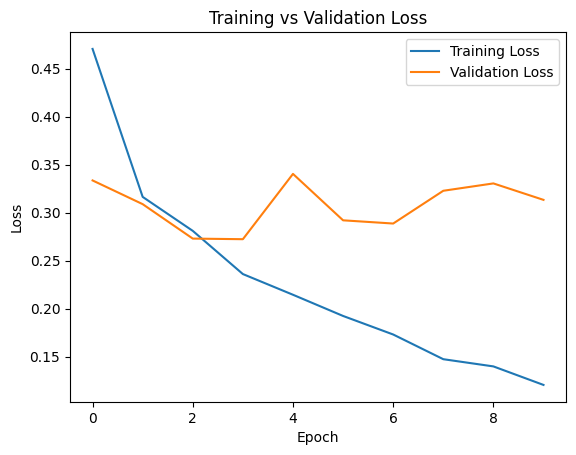

In [69]:
plt.plot(face.history['loss'], label='Training Loss')
plt.plot(face.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


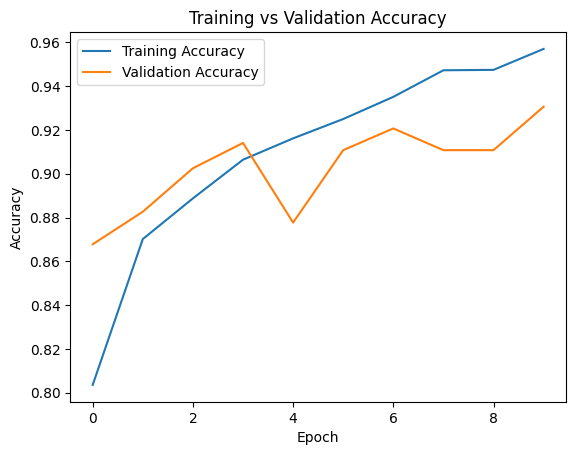

In [70]:

plt.plot(face.history['accuracy'], label='Training Accuracy')
plt.plot(face.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


Path of the image to be predicted: /content/test.png


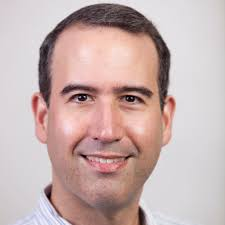

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
[[0.72494733 0.3976584 ]]
0
 the person is without the mask


In [73]:
input_image_path = input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==0:
  print(' the person is without the mask')
else:
  print('the person is with the mask')

Path of the image to be predicted: /content/images.jpg


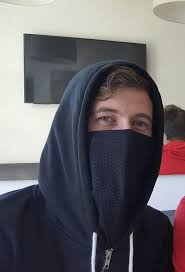

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.17215283 0.97124445]]
1
 the person is wearing the mask


In [77]:
input_image_path = input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print(' the person is wearing the mask')
else:
  print('the person is without the mask')